In [1]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('../artifacts/data/clean/processed_data.csv')
df.groupby("manual_label").count()

,ITEM_ID,ORD_CLOSED_DT,PRICE,item_mean_price,price_deviation,item_count,DOMINANTES
manual_label,,,,,,,
0,164847,164847,164847,164847,164847,164847,164847
1,11067,11067,11067,11067,11067,11067,11067


In [2]:
df = pd.read_csv('../precios_historicos.csv')

In [3]:
df.head()

,ITEM_ID,ORD_CLOSED_DT,PRICE
0,MLB4432316952,2024-02-15,22.0100
1,MLB4432316952,2024-03-02,19.8090
2,MLB4432316952,2024-02-16,22.0100
3,MLB4432316952,2024-03-08,23.8134
4,MLB4432316952,2024-02-22,19.0990


In [4]:
df.count()

ITEM_ID          175914
ORD_CLOSED_DT    175914
PRICE            175914
dtype: int64

In [5]:
n = len(pd.unique(df['ITEM_ID']))
print("# DE ITEMS:", n)

# DE ITEMS: 300


In [6]:
min_date = df['ORD_CLOSED_DT'].min()
max_date = df['ORD_CLOSED_DT'].max()
print(f"RANGO DE FECHAS: {min_date} a {max_date}")

RANGO DE FECHAS: 2023-12-13 a 2024-03-11


In [57]:
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.75)

df_count = df.groupby(df['ITEM_ID'],as_index=False)['PRICE'].agg(['count','mean','std','min','max',q1,q2,q3]).sort_values(['count'], ascending=False)
df_count['DOMINANTES'] = df_count['ITEM_ID'].where(df_count['count'] > 500 , other='OTROS')
df_count['IQR'] = df_count['q3']-df_count['q1']
df_count.head(10)

,ITEM_ID,count,mean,std,min,max,q1,q2,q3,DOMINANTES,IQR
210,MLB3836655204,96448,76.062967,85.580100,1.9241,2067.8253,22.4786,47.49900,98.25690,MLB3836655204,75.77830
212,MLB3836681004,48709,95.749039,113.222534,3.3299,3118.6892,31.7086,61.56410,116.51100,MLB3836681004,84.80240
211,MLB3836669552,2949,258.816288,197.475362,4.9700,1260.3991,117.2849,206.75200,335.97200,MLB3836669552,218.68710
191,MLB3687444228,251,131.625853,6.310556,123.5329,148.3829,124.9600,130.64000,135.32955,OTROS,10.36955
190,MLB3687430524,198,129.631441,5.829644,123.5329,144.5773,124.9600,128.08755,130.85300,OTROS,5.89300
24,MLB2173579748,191,92.739568,3.053655,88.9275,106.5000,90.4185,92.12250,94.78500,OTROS,4.36650
226,MLB4015013082,190,24.624556,0.856309,23.0040,26.1919,23.8489,24.72220,25.33990,OTROS,1.49100
9,MLB1813853929,189,44.232211,4.720903,35.6207,56.3456,42.0746,45.82340,47.17950,OTROS,5.10490
163,MLB3533718393,185,8.198965,0.929200,4.9700,11.5304,7.6680,8.16500,8.73300,OTROS,1.06500
167,MLB3544186473,183,41.795527,1.996577,35.9970,49.6290,40.8179,41.93260,43.15380,OTROS,2.33590


In [49]:
df_count.groupby(df_count['DOMINANTES'])['count'].sum().reset_index(name='count').sort_values(['count'], ascending=False).head()

,DOMINANTES,count
0,MLB3836655204,96448
2,MLB3836681004,48709
3,OTROS,27808
1,MLB3836669552,2949


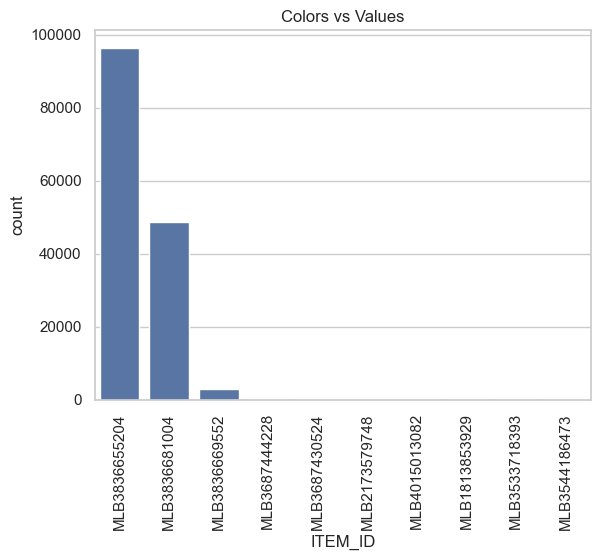

In [40]:
import matplotlib.pyplot as plt

fig = sns.barplot(df_count.head(10), y='count', x='ITEM_ID',)
plt.xticks(rotation=90)
plt.title("Colors vs Values") # You can comment this line out if you don't need title
plt.show(fig)

In [ ]:
df_dom = df.merge(df_count[['ITEM_ID', 'count', 'mean', 'std', 'min', 'max', 'q1', 'q2', 'q3',
       'DOMINANTES', 'IQR']],on='ITEM_ID')

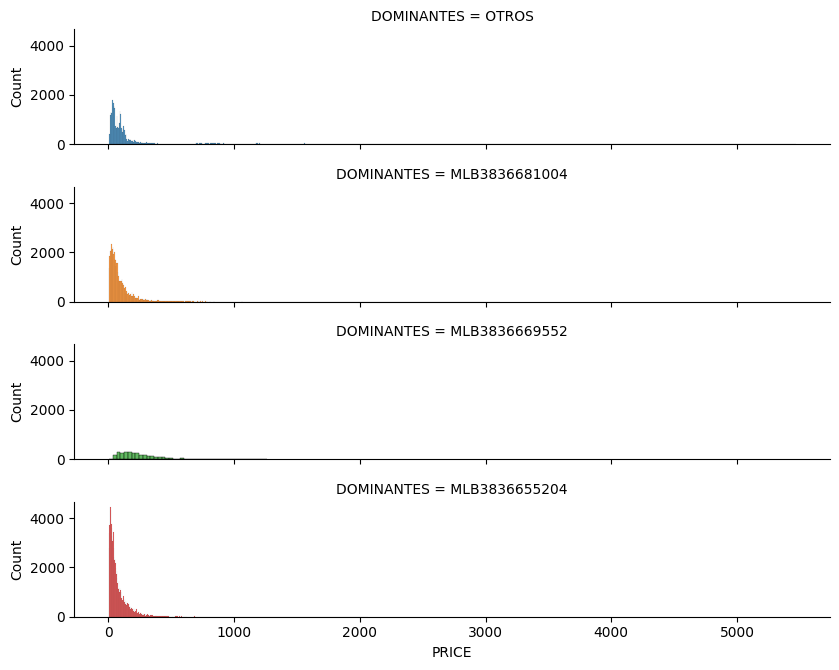

In [24]:
df_dom = df.merge(df_count,on='ITEM_ID')
g = sns.FacetGrid(df_dom, row="DOMINANTES",
                  height=1.7, aspect=5,hue="DOMINANTES")
g.map(sns.histplot, "PRICE")

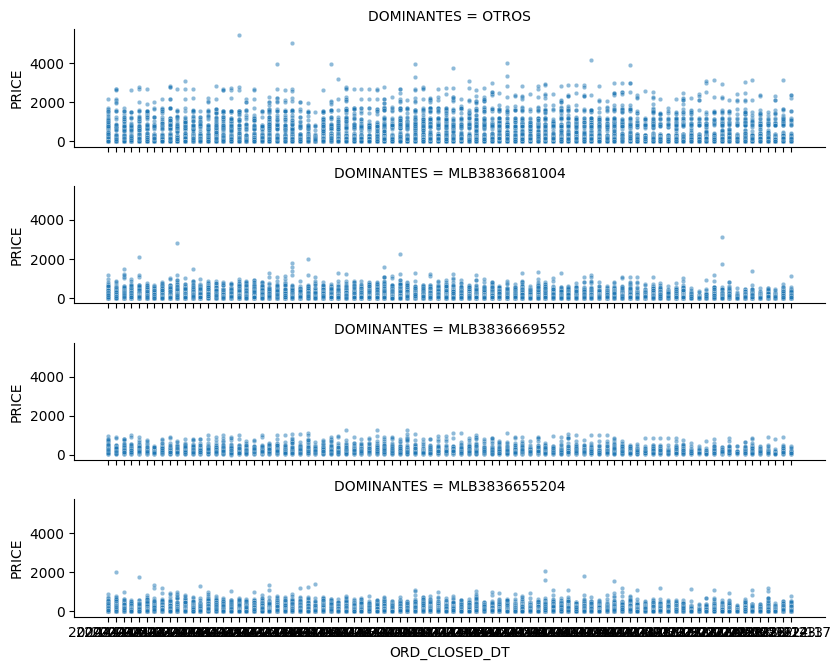

In [19]:
df_dom = df.merge(df_count,on='ITEM_ID')
g = sns.FacetGrid(df_dom, row="DOMINANTES",
                  height=1.7, aspect=5,)
g.map(sns.scatterplot, "ORD_CLOSED_DT", "PRICE", s=10, alpha=.5,)

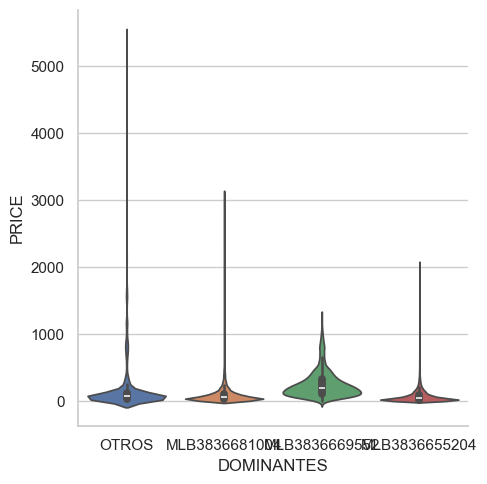

In [33]:
sns.catplot(x="DOMINANTES",y="PRICE",data=df_dom,hue='DOMINANTES', kind='violin')

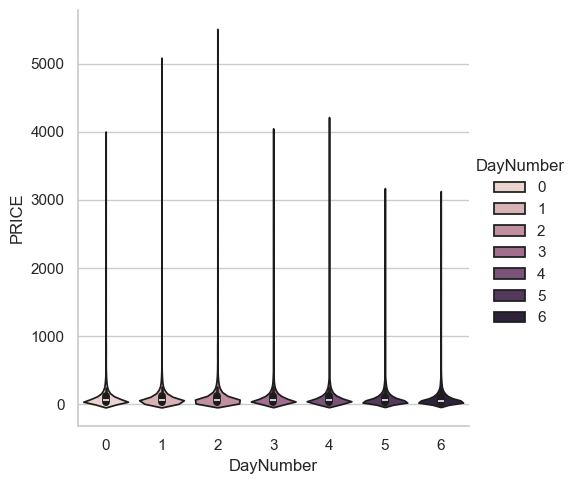

In [41]:
df_days = df_dom
df_days['date'] = pd.to_datetime(df_days['ORD_CLOSED_DT'])
df_days['DayNumber'] = df_days['date'].dt.dayofweek
sns.catplot(x="DayNumber",y="PRICE",data=df_days,hue='DayNumber', kind='violin')

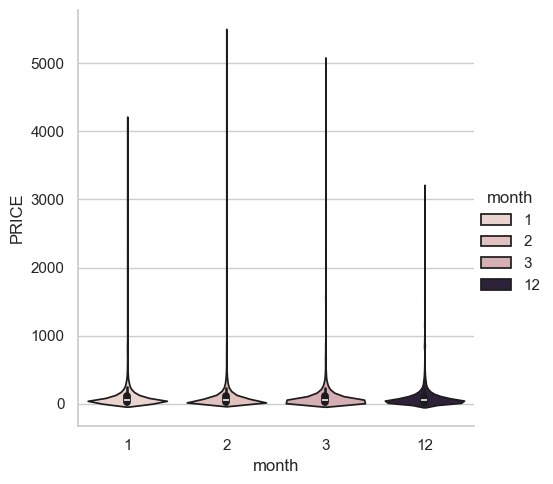

In [42]:
df_days = df_dom
df_days['date'] = pd.to_datetime(df_days['ORD_CLOSED_DT'])
df_days['month'] = df_days['date'].dt.month
sns.catplot(x="month",y="PRICE",data=df_days,hue='month', kind='violin')